In [1]:
from scipy.optimize import fsolve
def value(r,price,fv,year,cr):
    final_pay = fv/(1+r)**year
    coupon_payment = (fv*cr)
    annuity_value = coupon_payment*(1-(1+r)**(-year))/r
    return annuity_value+final_pay-price
def findYield(price,fv,year,cr):
    return fsolve(value, cr,(price,fv,year,cr))[0]
findYield(1141.40378526,1000,5,.05)

0.019999999999048713

In [2]:
print(findYield(800,1000,5,.05))
print((1000/800)**(1/5)-1)

0.10319016332
0.04563955259127317


In [3]:
import datetime
import pandas_datareader as pdr
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)
bondYields = pdr.fred.FredReader(["TB3MS","TB6MS","TB1YR","GS5","GS10","GS30"], start, end).read()
print(bondYields)

            TB3MS  TB6MS  TB1YR   GS5  GS10  GS30
DATE                                             
2016-01-01   0.26   0.43   0.52  1.52  2.09  2.86
2016-02-01   0.31   0.44   0.52  1.22  1.78  2.62
2016-03-01   0.29   0.46   0.64  1.38  1.89  2.68
2016-04-01   0.23   0.37   0.54  1.26  1.81  2.62
2016-05-01   0.27   0.41   0.57  1.30  1.81  2.63
2016-06-01   0.27   0.40   0.54  1.17  1.64  2.45
2016-07-01   0.30   0.39   0.50  1.07  1.50  2.23
2016-08-01   0.30   0.44   0.55  1.13  1.56  2.26
2016-09-01   0.29   0.46   0.58  1.18  1.63  2.35
2016-10-01   0.33   0.47   0.64  1.27  1.76  2.50
2016-11-01   0.45   0.57   0.71  1.60  2.14  2.86
2016-12-01   0.51   0.63   0.84  1.96  2.49  3.11
2017-01-01   0.51   0.61   0.80  1.92  2.43  3.02


In [4]:
print(bondYields.iloc[-1,:])

TB3MS    0.51
TB6MS    0.61
TB1YR    0.80
GS5      1.92
GS10     2.43
GS30     3.02
Name: 2017-01-01 00:00:00, dtype: float64


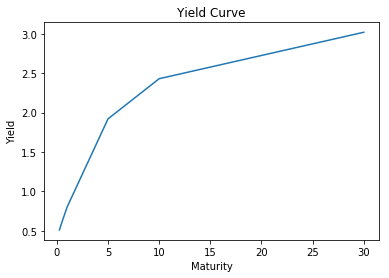

In [5]:
import matplotlib.pyplot as plt
plt.plot([.25,.5,1,5,10,30],bondYields.iloc[-1,:])
plt.title("Yield Curve")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.show()

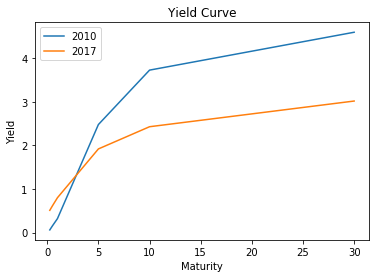

In [6]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)
bondYields = pdr.fred.FredReader(["TB3MS","TB6MS","TB1YR","GS5","GS10","GS30"], start, end).read()
plt.plot([.25,.5,1,5,10,30],bondYields.iloc[0,:])
plt.plot([.25,.5,1,5,10,30],bondYields.iloc[-1,:])
plt.title("Yield Curve")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.legend(["2010","2017"])
plt.show()